# Dataset Overview

**Understanding dataset size**

In [ ]:
# download, decompress the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Path to the directory containing your dataset
train_image_dir = "/content/drive/MyDrive/wb_localization_dataset/images/train"
train_annotation_dir = "/content/drive/MyDrive/wb_localization_dataset/labels/train"
val_image_dir = "/content/drive/MyDrive/wb_localization_dataset/images/val"
val_annotation_dir = "/content/drive/MyDrive/wb_localization_dataset/labels/val"

In [ ]:
# Function to count the total number of images and objects
def count_images_and_objects(image_dir, annotation_dir):
    total_images = 0
    total_objects = 0

    # Iterate through each image file in the image directory
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(image_dir, filename)
            annotation_path = os.path.join(annotation_dir, os.path.splitext(filename)[0] + ".txt")

            # Read annotation file (assuming YOLO format with one object per line)
            with open(annotation_path, 'r') as f:
                annotations = f.readlines()

            # Increment total_objects by the number of objects in the current annotation file
            total_objects += len(annotations)
            total_images += 1

    return total_images, total_objects

# Call the function to get dataset statistics
total_images, total_objects = count_images_and_objects(train_image_dir, train_annotation_dir)

# Calculate the average number of objects per image
if total_images > 0:
    avg_objects_per_image = total_objects / total_images
else:
    avg_objects_per_image = 0

# Print the dataset statistics
print("Total number of images:", total_images)
print("Total number of objects:", total_objects)
print("Average number of objects per image:", avg_objects_per_image)


Total number of images: 70
Total number of objects: 13669
Average number of objects per image: 195.27142857142857


The dataset, comprising 70 images with a total of 13,669 annotated objects, demonstrates significant complexity and richness. The high object density per image suggests the presence of challenging scenarios that necessitate careful consideration during model training and evaluation. To enhance model performance and robustness, we need to consider applying data augmentation techniques such as geometric transformations, photometric adjustments, noise addition, and synthetic data generation (e.g., MixUp, CutMix).

**Visualize a few sample images with annotated bounding boxes to get a sense of the data**

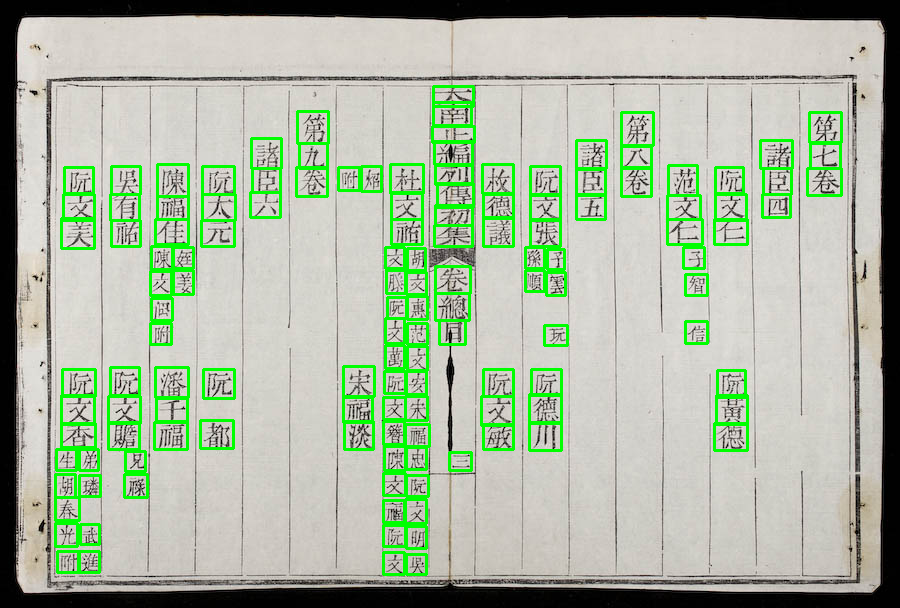

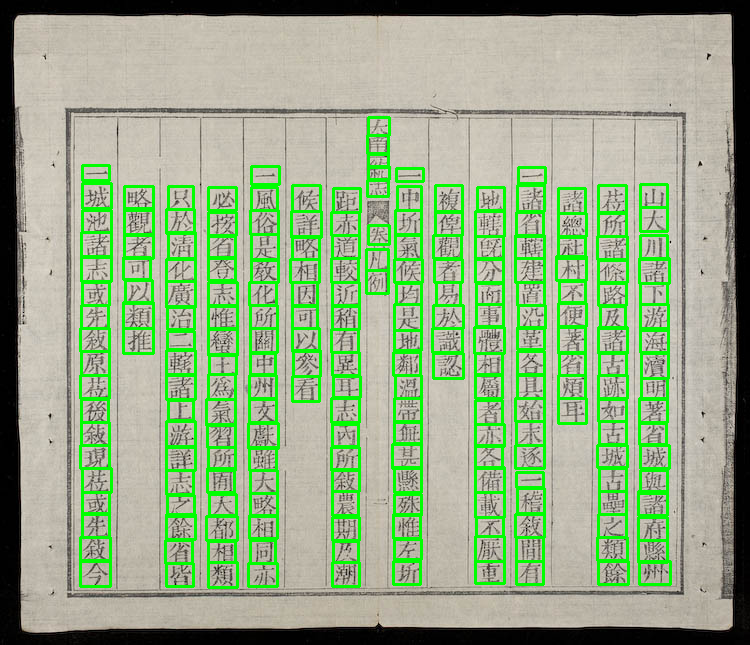

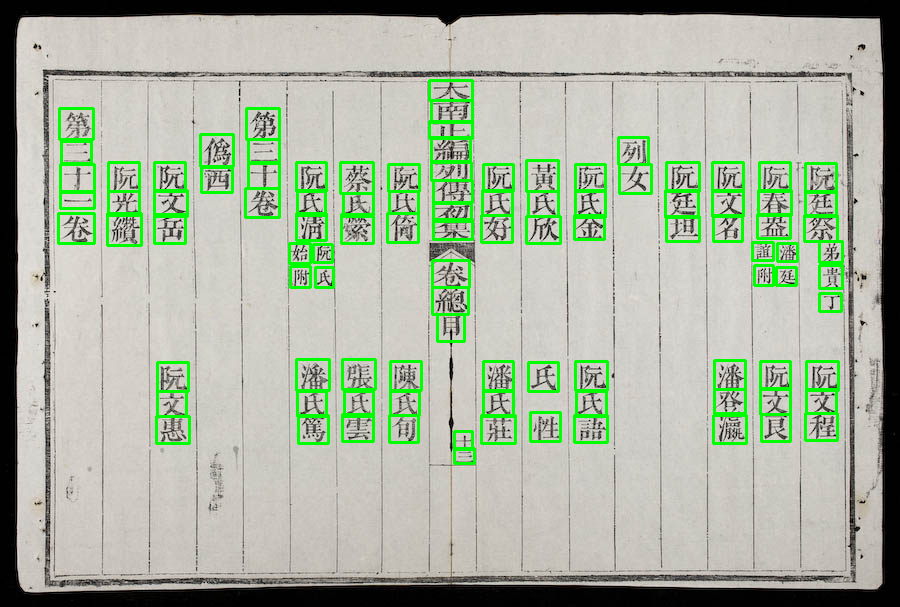

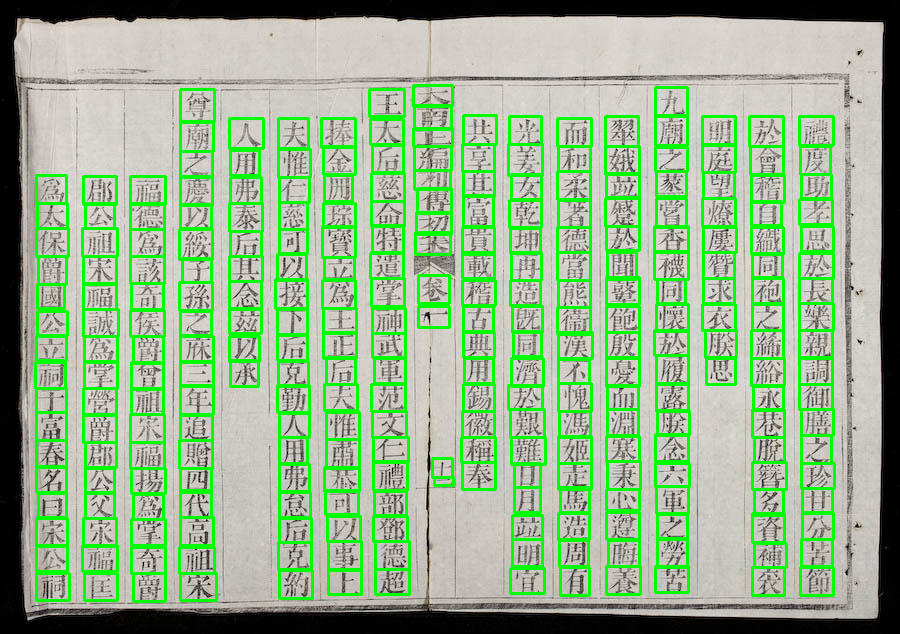

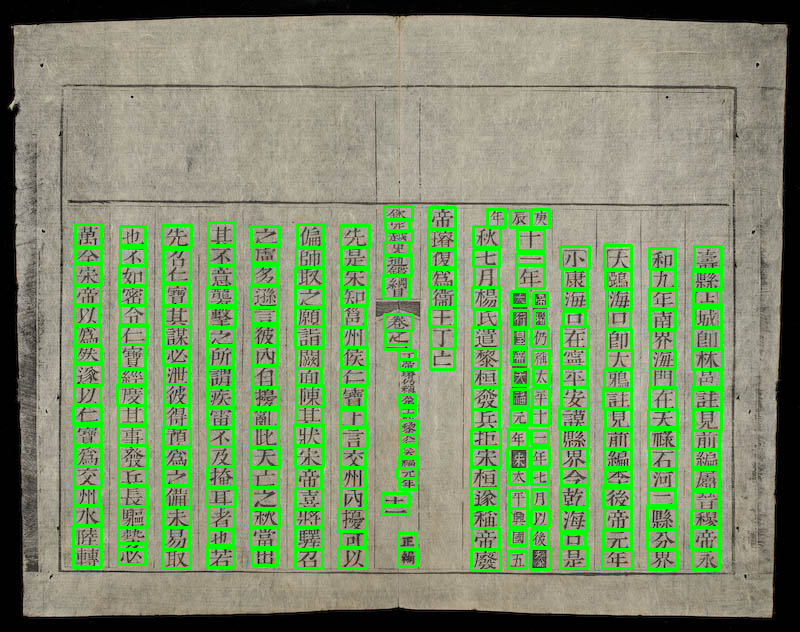

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

def visualize_sample_images(image_dir, annotation_dir, num_samples=5):
    # Iterate through the first num_samples images in the dataset
    for filename in os.listdir(image_dir)[:num_samples]:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(image_dir, filename)
            annotation_path = os.path.join(annotation_dir, os.path.splitext(filename)[0] + ".txt")

            # Read the image
            image = cv2.imread(image_path)

            # Read annotation file (assuming YOLO format with one object per line)
            with open(annotation_path, 'r') as f:
                annotations = f.readlines()

            # Draw bounding boxes on the image
            for annotation in annotations:
                class_index, center_x, center_y, width, height = map(float, annotation.split())
                img_height, img_width, _ = image.shape

                # Convert normalized coordinates to absolute coordinates
                x1 = int((center_x - width / 2) * img_width)
                y1 = int((center_y - height / 2) * img_height)
                x2 = int((center_x + width / 2) * img_width)
                y2 = int((center_y + height / 2) * img_height)

                # Draw bounding box
                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Display the image with bounding boxes
            cv2_imshow(image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

# Example usage
visualize_sample_images(train_image_dir, train_annotation_dir, num_samples=5)


This process involves verifying the accuracy of the bounding box annotations to ensure they correctly enclose the intended objects without any misalignments or omissions. Additionally, this visualization provides insights into the diversity of Sino-nom character sizes and highlights special cases in the dataset, such as text with white color on a black background (contrasting with the more common black text on a white background) and instances of text with inkblots.

# Object Distribution

Visualizing and analyzing object distributions to tailor algorithms and models to better suit the characteristics of the dataset, leading to improved performance and generalization. Additionally, it aids in identifying potential biases or imbalances in the dataset that may need to be addressed during training to ensure fair and accurate model predictions.

**Train dataset**

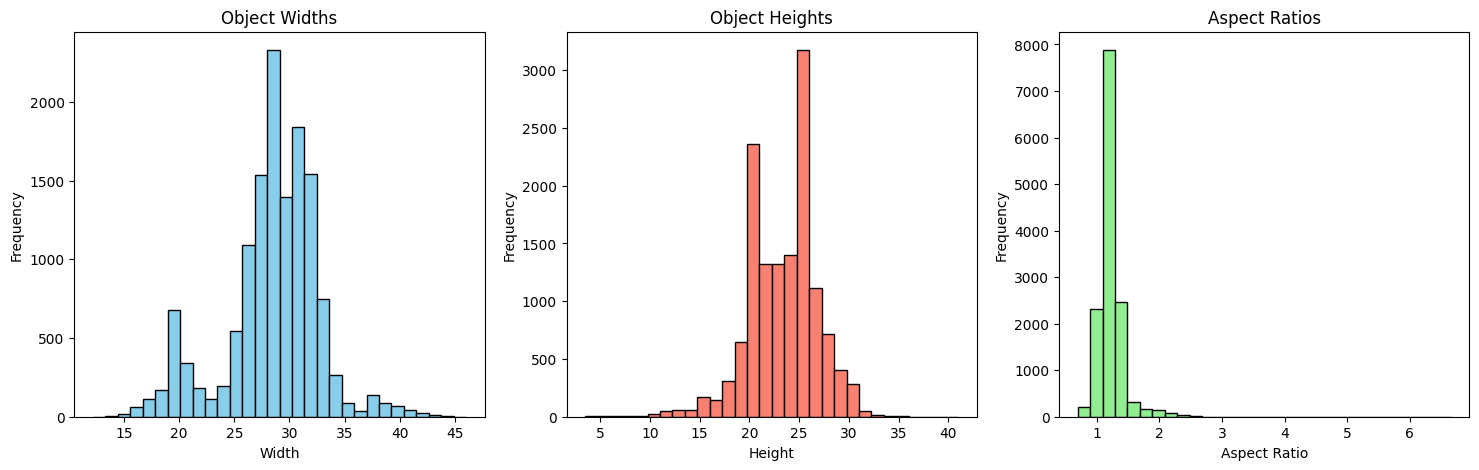

In [ ]:
# Function to calculate object sizes and aspect ratios
def calculate_object_sizes_and_aspect_ratios(image_dir, annotation_dir):
    object_widths = []
    object_heights = []
    aspect_ratios = []

    # Iterate through each image file in the dataset directory
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(image_dir, filename)
            annotation_path = os.path.join(annotation_dir, os.path.splitext(filename)[0] + ".txt")

            # Read the image
            image = cv2.imread(image_path)
            img_height, img_width, _ = image.shape

            # Read annotation file (assuming YOLO format with one object per line)
            with open(annotation_path, 'r') as f:
                annotations = f.readlines()

            # Calculate object sizes and aspect ratios
            for annotation in annotations:
                _, center_x, center_y, width, height = map(float, annotation.split())

                # Convert normalized coordinates to absolute coordinates
                obj_width = width * img_width
                obj_height = height * img_height

                # Calculate aspect ratio
                aspect_ratio = obj_width / obj_height

                # Append to lists
                object_widths.append(obj_width)
                object_heights.append(obj_height)
                aspect_ratios.append(aspect_ratio)

    return object_widths, object_heights, aspect_ratios

#Train dataset
# Calculate object sizes and aspect ratios
object_widths, object_heights, aspect_ratios = calculate_object_sizes_and_aspect_ratios(train_image_dir, train_annotation_dir)

# Plot histograms of object widths, heights, and aspect ratios
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(object_widths, bins=30, color='skyblue', edgecolor='black')
plt.title('Object Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(object_heights, bins=30, color='salmon', edgecolor='black')
plt.title('Object Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(aspect_ratios, bins=30, color='lightgreen', edgecolor='black')
plt.title('Aspect Ratios')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')

plt.show()



**Object Widths:**
* The widths predominantly range from 15 to 40 units, with a peak around 30 units.
* There is a relatively symmetrical distribution around the mean, suggesting a normal distribution with a slight skew to the left.

**Object Heights:**
* The heights vary from approximately 10 to 35 units, with a significant
peak around 25 units.
* This distribution appears to be slightly right-skewed, indicating that there are more objects with heights shorter than the mean.

**Aspect Ratios:**
* The histogram on the right illustrates the distribution of aspect ratios (width divided by height).
* Most aspect ratios are clustered around 1, meaning that the objects are generally close to being square.
* There are fewer objects with higher aspect ratios, and the frequency diminishes rapidly beyond a ratio of 2, indicating that elongated objects are rare in this dataset. To address this imbalance, generating synthetic examples of objects with higher aspect ratios can help the model learn to detect them more reliably. It's essential to consider these special cases and plan for them by augmenting the data to ensure the model performs well.

**Validation dataset**

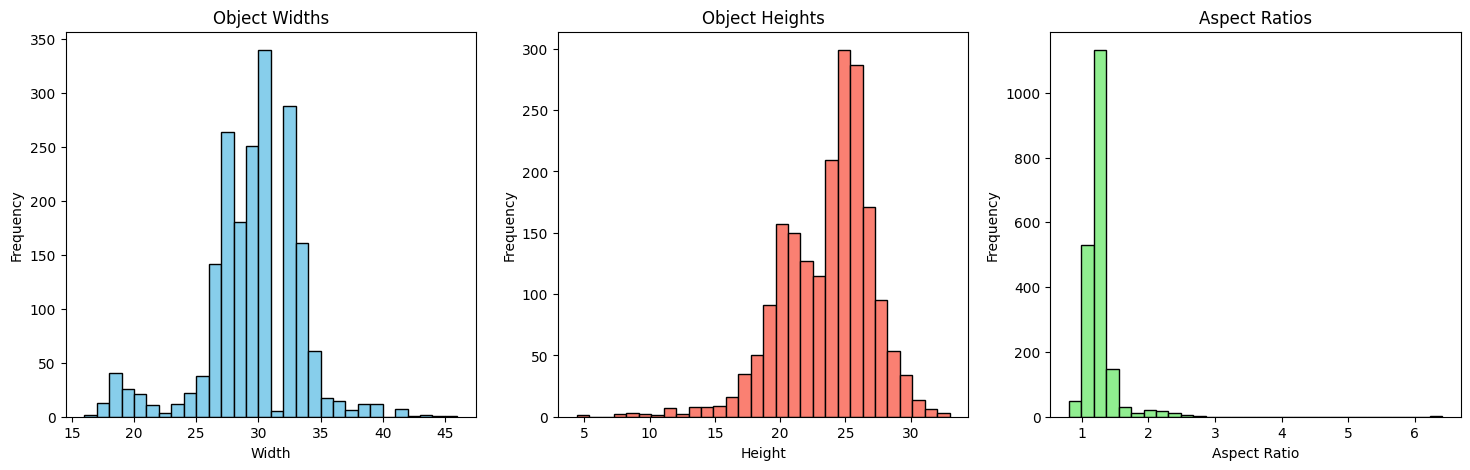

In [ ]:
#Validation set
# Calculate object sizes and aspect ratios
object_widths, object_heights, aspect_ratios = calculate_object_sizes_and_aspect_ratios(val_image_dir, val_annotation_dir)

# Plot histograms of object widths, heights, and aspect ratios
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(object_widths, bins=30, color='skyblue', edgecolor='black')
plt.title('Object Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(object_heights, bins=30, color='salmon', edgecolor='black')
plt.title('Object Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(aspect_ratios, bins=30, color='lightgreen', edgecolor='black')
plt.title('Aspect Ratios')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')

plt.show()


The comparison of object distributions between the training and validation datasets reveals a high degree of similarity in terms of object widths, heights, and aspect ratios. This consistency is crucial for model evaluation, ensuring that the validation set accurately represents the distribution seen during training, which leads to reliable performance metrics. Such uniformity suggests that the validation results will be a good indicator of the model's real-world performance on unseen data.

#Bounding Box Distribution

Analyzing bounding box distribution is crucial for dataset understanding, model design, and evaluation. It helps in selecting appropriate evaluation metrics and designing strategies to improve model performance.

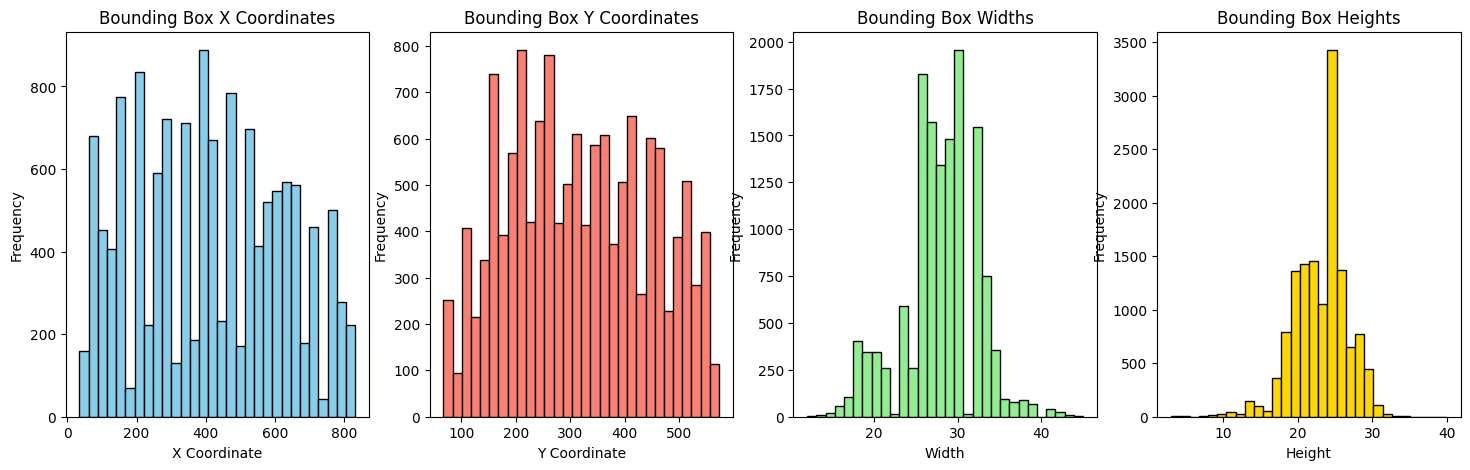

In [ ]:
# Function to calculate bounding box coordinates
def calculate_bbox_coordinates(image_dir, annotation_dir):
    bbox_x = []
    bbox_y = []
    bbox_width = []
    bbox_height = []

    # Iterate through each image file in the dataset directory
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(image_dir, filename)
            annotation_path = os.path.join(annotation_dir, os.path.splitext(filename)[0] + ".txt")

            # Read the image
            image = cv2.imread(image_path)
            img_height, img_width, _ = image.shape

            # Read annotation file (assuming YOLO format with one object per line)
            with open(annotation_path, 'r') as f:
                annotations = f.readlines()

            # Calculate bounding box coordinates
            for annotation in annotations:
                _, center_x, center_y, width, height = map(float, annotation.split())

                # Convert normalized coordinates to absolute coordinates
                x1 = int((center_x - width / 2) * img_width)
                y1 = int((center_y - height / 2) * img_height)
                bbox_x.append(x1)
                bbox_y.append(y1)
                bbox_width.append(int(width * img_width))
                bbox_height.append(int(height * img_height))

    return bbox_x, bbox_y, bbox_width, bbox_height

# Calculate bounding box coordinates
bbox_x, bbox_y, bbox_width, bbox_height = calculate_bbox_coordinates(image_dir, annotation_dir)

# Plot histograms or box plots for each coordinate
plt.figure(figsize=(18, 5))

plt.subplot(1, 4, 1)
plt.hist(bbox_x, bins=30, color='skyblue', edgecolor='black')
plt.title('Bounding Box X Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
plt.hist(bbox_y, bins=30, color='salmon', edgecolor='black')
plt.title('Bounding Box Y Coordinates')
plt.xlabel('Y Coordinate')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
plt.hist(bbox_width, bins=30, color='lightgreen', edgecolor='black')
plt.title('Bounding Box Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 4, 4)
plt.hist(bbox_height, bins=30, color='gold', edgecolor='black')
plt.title('Bounding Box Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.show()


**Bounding Box X Coordinates:**
* The X coordinates are spread fairly evenly across the range from 0 to 800, with some fluctuations.
* This indicates that objects are distributed throughout the horizontal space of the images, without any significant clustering in specific areas.

**Bounding Box Y Coordinates:**
* Similar to the X coordinates, the Y coordinates are also spread across the range from 0 to 600, showing a broad distribution.
* This suggests a uniform vertical distribution of objects in the images, implying that objects appear throughout the images rather than being concentrated in particular regions.

